In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as snb

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [3]:
fraud=pd.read_csv("C:\\Users\\deepa\\Downloads\\Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud[fraud.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
# Label encoding for categorical values
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad']) 
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status']) 
fraud['Urban']= label_encoder.fit_transform(fraud['Urban']) 

In [8]:
fraud["Taxable.Income"]=(fraud["Taxable.Income"]>30000)*1

In [9]:
x=fraud.drop(axis=0,columns="Taxable.Income")
y=fraud["Taxable.Income"]

In [10]:
fraud["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [11]:
#Train test split at a ratio of 70:30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [12]:
#Constructing a Random forest classfier model
model = RandomForestClassifier(n_estimators=110, max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

In [13]:
#Predicting the model on the train data, to evaluate the train accuracy
Y_pred=model.predict(x_train)
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


In [14]:
#Finding the train accuracy
model.score(x_train, y_train)

1.0

In [15]:
#Predicting the model on the test data
y_pred=model.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7388888888888889


In [16]:
#Identifying the important features that contribute to the output and sorting it in ascending order
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

City.Population    0.544717
Work.Experience    0.284931
Marital.Status     0.073997
Undergrad          0.049953
Urban              0.046403
dtype: float64

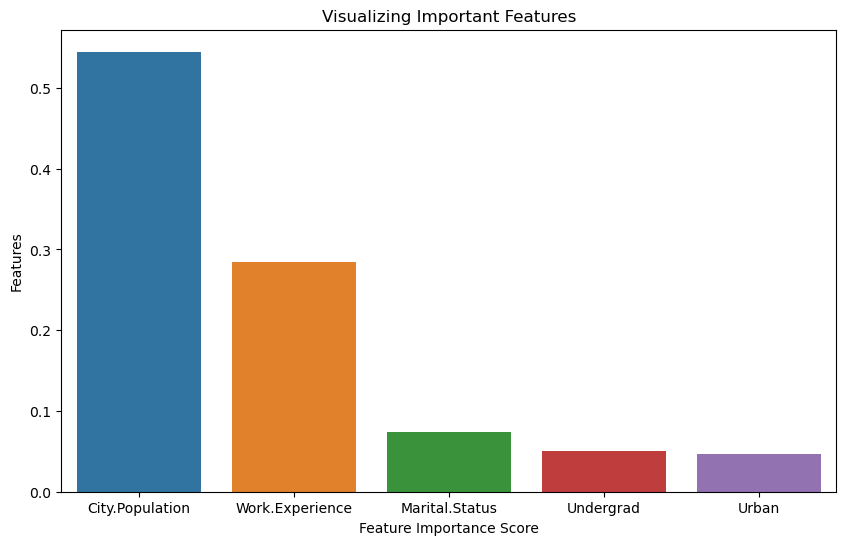

In [17]:
#Bar plot for representing the important features
plt.figure(figsize=(10,6))
snb.barplot(y=feature_imp, x=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [18]:
#Running a loop from the range of 1 to 5 for different max_features in the Random forest classifier
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [19]:
#jotting down the test accuracies for different max_features of the Random Forest classifier
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.727778
1,2,1.0,0.727778
2,3,1.0,0.727778
3,4,1.0,0.744444
4,5,1.0,0.716667
5,6,1.0,0.744444
6,7,1.0,0.727778
7,8,1.0,0.733333
8,9,1.0,0.727778


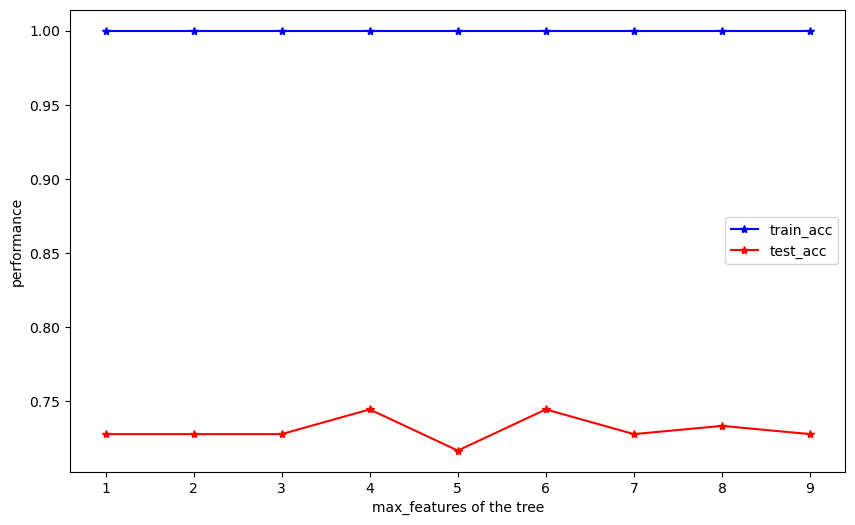

In [21]:
#Visualizing the accuracy graph for different max_depth parameters of the Random forest classifier
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = '*',color='blue')
plt.plot(data['max_features'], data['test_acc'], marker = '*', color='red')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

In [22]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  1,  40],
       [  7, 132]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7277777777777777')

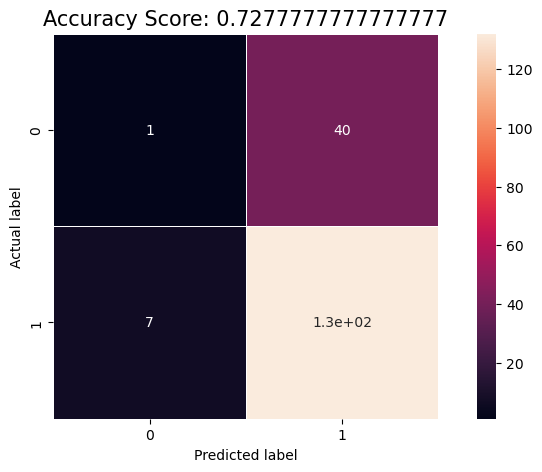

In [23]:
#Visualising the confusion Matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
snb.heatmap(data=cm,linewidths=.5, annot=True,square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [24]:
#Predicting the values of test data and viewing the classification report
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.17      0.05      0.08        41
           1       0.77      0.93      0.84       139

    accuracy                           0.73       180
   macro avg       0.47      0.49      0.46       180
weighted avg       0.63      0.73      0.67       180



In [30]:
#Trying a cross validation KFold split, to check if the accuracy of the model increases
kfold=KFold(n_splits=8,random_state=7,shuffle=True)
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7466666666666667


In [32]:
#Constructing an Adaboost classifier to classify the highes risk of fraud taxable income, with the cross validation Kfold
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

In [33]:
#Evaluating the Adaboost classfier with Kfold and checking the accuracy
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7933333333333332


In [38]:
#checking the accuracy in train test split
model.fit(x_train,y_train)
print("accuracy:",model.score(x_train, y_train))

accuracy: 0.8023809523809524


In [39]:
#Predict the model on the test data
y_pred=model.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7666666666666667


In [40]:
data

,max_features,train_acc,test_acc
0,1,1.0,0.727778
1,2,1.0,0.727778
2,3,1.0,0.727778
3,4,1.0,0.744444
4,5,1.0,0.716667
5,6,1.0,0.744444
6,7,1.0,0.727778
7,8,1.0,0.733333
8,9,1.0,0.727778


In [ ]:
#It is evident that the highest accuracy from the Random forest classifier is, when it takes 4 and 6 maximum feature, of 74.4% .
#Thus, it can be used as the final model to predict and meet the objective of the problem.
#Also, the Adaboost classifier gives an accuracy of 76.66% to classify the data that has a higher risk of be 
#in a fraud in taxable income.